<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Mean-Filter/Mean_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEAN FILTER**

The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image). Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise (but see the discussion below), also having applications in signal processing.

The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image). Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise (but see the discussion below), also having applications in signal processing.

In the example above, because there is no entry preceding the first value, the first value is repeated, as with the last value, to obtain enough entries to fill the window. This is one way of handling missing window entries at the boundaries of the signal, but there are other schemes that have different properties that might be preferred in particular circumstances:

- Avoid processing the boundaries, with or without cropping the signal or image boundary afterwards,
- Fetching entries from other places in the signal. With images for example, entries from the far horizontal or vertical boundary might be selected,
- Shrinking the window near the boundaries, so that every window is full.

Typically, by far the majority of the computational effort and time is spent on calculating the median of each window. Because the filter must process every entry in the signal, for large signals such as images, the efficiency of this median calculation is a critical factor in determining how fast the algorithm can run. The naïve implementation described above sorts every entry in the window to find the median; however, since only the middle value in a list of numbers is required, selection algorithms can be much more efficient. Furthermore, some types of signals (very often the case for images) use whole number representations: in these cases, histogram medians can be far more efficient because it is simple to update the histogram from window to window, and finding the median of a histogram is not particularly onerous.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-03 19:44:22--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.128.84, 2600:1402:3800:29c::1931, 2600:1402:3800:28a::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|199.232.128.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.03s   

2020-12-03 19:44:22 (4.96 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [3]:
img = cv.imread('AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
img = np.array(img)
shape = img.shape
output = np.zeros((shape[0], shape[1]))
step = 1
win = 3
for i in range(0, shape[0], step):
    for j in range(0, shape[1], step):
        if i <= int(win/2) or shape[0]-i <= int(win/2) or j <= int(win/2) or shape[1]-j <= int(win/2):
            continue
        kernel = img[i-int(win/2):i+int(win/2)+1, j-int(win/2):j+int(win/2)+1]              
        output[i, j] = np.mean(kernel)

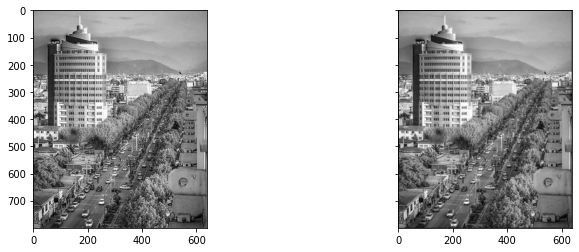

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(output, cmap='gray')
plt.show()